In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from collections import Counter
from keras.preprocessing.sequence import pad_sequences
import nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/training_set_new.csv', sep=';')

<ipython-input-54-c80692ab0dc2>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/training_set_new.csv', sep=';')


In [ ]:
data

,skills,target
0,background,0
1,a career,0
2,data science,1
3,a positive impact,0
4,others,0
...,...,...
470955,pharmacy channels,NaN
470956,grocery retailers,NaN
470957,variety discount stores,NaN
470958,speciality beauty retailers,NaN


In [ ]:
data.loc[data['skills'] == 'machine learning']

,skills,target
1601,machine learning,1


In [ ]:
data = data.iloc[0:8000]

In [ ]:
data['target'].fillna(0, inplace=True)

<ipython-input-7-a2bf6a6befb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'].fillna(0, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   skills  8000 non-null   object
 1   target  8000 non-null   object
dtypes: object(2)
memory usage: 125.1+ KB


In [ ]:
data.loc[(data['target'] != '0') & (data['target'] != '1') & (data['target'] != 0)]

,skills,target
2362,benefits,


In [ ]:
data.iloc[2362]['target']

'  '

In [ ]:
data.drop([2362], axis=0, inplace=True)

<ipython-input-11-e106439e3636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop([2362], axis=0, inplace=True)


In [ ]:
data['target'] = data['target'].astype(int)

<ipython-input-12-b84843a1bd3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].astype(int)


In [ ]:
data.target.value_counts(normalize=True)

0    0.759595
1    0.240405
Name: target, dtype: float64

<Axes: xlabel='Target', ylabel='Counts'>

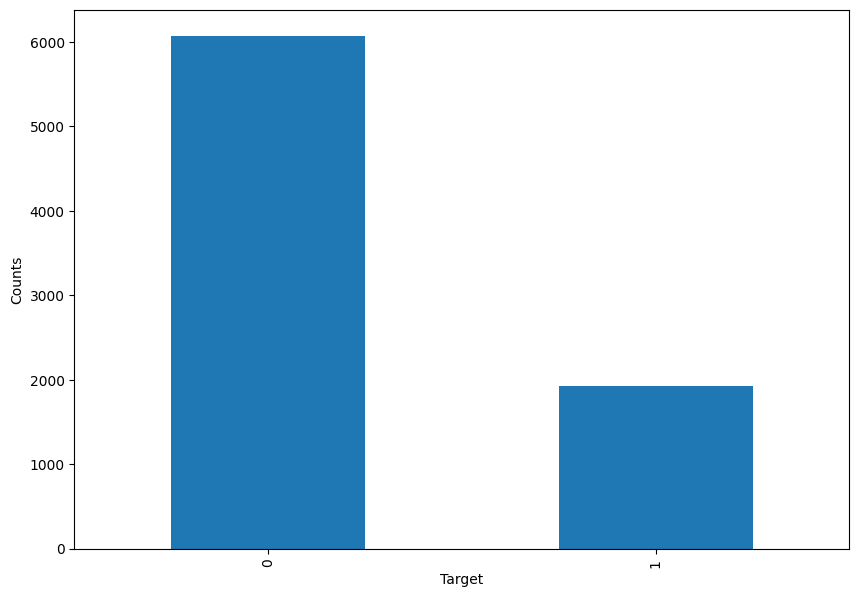

In [ ]:
plt.figure(figsize=(10,7))

plt.xlabel("Target")
plt.ylabel("Counts")

data["target"].value_counts().plot(kind='bar')

In [ ]:
sample = data.sample(200)
sample

,skills,target
6509,part-time / fixed-term work,0
590,the field,0
1409,competitive research,1
3588,bit.ly/rekrutmenmekari-faq [ ina ],0
331,program,0
...,...,...
6986,practice web3 development,0
718,the notice,0
3168,other applicable storage forms,0
5326,comprehensive security assessments,0


## LSTM

In [ ]:
def split_train_test(features, target, size):
    #size is the size of the training set
    train_size = int(features.shape[0]* size) #check me
    X_train = features[:train_size]
    y_train = target[:train_size]

    X_test = features[train_size:]
    y_test = target[train_size:]
    return X_train, y_train, X_test, y_test

In [ ]:
train = data[['skills','target']]
features = train['skills']
target = train['target']
X_train, y_train, X_test, y_test = split_train_test(features, target, 0.8)

In [ ]:
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [ ]:
text = sample['skills']
counter = counter_word(text)

In [ ]:
len(counter)

320

In [ ]:
num_words = len(counter)

In [ ]:
data['skills'].str.len().max()

223

In [ ]:
data['skills'].str.len().idxmax()

4750

In [ ]:
data.iloc[4750]

skills    configuration backup
target                       0
Name: 4751, dtype: object

In [ ]:
max_length = 20

In [ ]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

[225]

In [ ]:
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
train_padded[0]

array([225,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [ ]:
decode(train_sequences[0])

'background'

In [ ]:
print(train_padded.shape)
print(test_padded.shape)

(6399, 20)
(1600, 20)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words, 32, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history = model.fit(
    train_padded, y_train, epochs=15, validation_split=0.2
)

Epoch 1/15
160/160 [==============================] - 13s 36ms/step - loss: 0.6122 - accuracy: 0.7035 - val_loss: 0.5401 - val_accuracy: 0.8258
Epoch 2/15
160/160 [==============================] - 5s 30ms/step - loss: 0.5956 - accuracy: 0.7152 - val_loss: 0.7311 - val_accuracy: 0.7008
Epoch 3/15
160/160 [==============================] - 5s 31ms/step - loss: 0.5333 - accuracy: 0.7376 - val_loss: 0.4581 - val_accuracy: 0.8141
Epoch 4/15
160/160 [==============================] - 2s 13ms/step - loss: 0.5256 - accuracy: 0.7533 - val_loss: 0.4828 - val_accuracy: 0.8008
Epoch 5/15
160/160 [==============================] - 2s 13ms/step - loss: 0.5119 - accuracy: 0.7722 - val_loss: 0.4650 - val_accuracy: 0.7898
Epoch 6/15
160/160 [==============================] - 2s 13ms/step - loss: 0.4942 - accuracy: 0.7968 - val_loss: 0.4440 - val_accuracy: 0.8016
Epoch 7/15
160/160 [==============================] - 2s 13ms/step - loss: 0.4996 - accuracy: 0.7951 - val_loss: 0.4713 - val_accuracy: 0.787

In [ ]:
model.save('/content/drive/MyDrive/WEB SCRAPING 101/Model Saved/lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## GloVe Embeddings

In [ ]:
from tqdm import tqdm
from keras.layers import Dense,SpatialDropout1D
from nltk.tokenize import word_tokenize

"""Creates corpus from feature column, which is a pandas series"""
def create_corpus(df):
    corpus=[]
    for phrase in tqdm(df['skills']):
        words=[word.lower() for word in word_tokenize(phrase) if(word.isalpha()==1)]
        corpus.append(words)
    return corpus

In [ ]:
"""Creates an embedding dictionary using GloVe"""
embedding_dict={}
with open('/content/drive/MyDrive/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
"""Create padded sequences of equal lenght as input to LSTM"""
def create_padded_inputs(corpus):
    MAX_LEN=20
    tokenizer_obj=Tokenizer()
    tokenizer_obj.fit_on_texts(corpus)
    sequences=tokenizer_obj.texts_to_sequences(corpus)

    phrase_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')
    return phrase_pad

In [ ]:
corpus=create_corpus(data)
phrase_pad = create_padded_inputs(corpus)

100%|██████████| 7999/7999 [00:00<00:00, 12015.77it/s]


In [ ]:
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 3565


In [ ]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 3565/3565 [00:00<00:00, 785949.74it/s]


In [ ]:
model_embed = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=20,trainable=False),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

model_embed.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
X_train, y_train, X_test, y_test = split_train_test(phrase_pad, data['target'], 0.8)

In [ ]:
history=model_embed.fit(X_train,y_train,batch_size=4,epochs=15,validation_split=0.2,verbose=2)

Epoch 1/15
1280/1280 - 36s - loss: 0.6686 - accuracy: 0.7027 - val_loss: 0.5502 - val_accuracy: 0.8258 - 36s/epoch - 28ms/step
Epoch 2/15
1280/1280 - 34s - loss: 0.6103 - accuracy: 0.7027 - val_loss: 0.5020 - val_accuracy: 0.8258 - 34s/epoch - 26ms/step
Epoch 3/15
1280/1280 - 31s - loss: 0.6092 - accuracy: 0.7027 - val_loss: 0.5023 - val_accuracy: 0.8258 - 31s/epoch - 24ms/step
Epoch 4/15
1280/1280 - 31s - loss: 0.6094 - accuracy: 0.7027 - val_loss: 0.5005 - val_accuracy: 0.8258 - 31s/epoch - 24ms/step
Epoch 5/15
1280/1280 - 31s - loss: 0.6091 - accuracy: 0.7027 - val_loss: 0.5050 - val_accuracy: 0.8258 - 31s/epoch - 24ms/step
Epoch 6/15
1280/1280 - 44s - loss: 0.6096 - accuracy: 0.7027 - val_loss: 0.5039 - val_accuracy: 0.8258 - 44s/epoch - 34ms/step
Epoch 7/15
1280/1280 - 32s - loss: 0.6084 - accuracy: 0.7027 - val_loss: 0.5011 - val_accuracy: 0.8258 - 32s/epoch - 25ms/step
Epoch 8/15
1280/1280 - 32s - loss: 0.6089 - accuracy: 0.7027 - val_loss: 0.4983 - val_accuracy: 0.8258 - 32s/ep

In [ ]:
model_embed.save('/content/drive/MyDrive/WEB SCRAPING 101/Model Saved/embed_model.h5')